In [1]:
#import libraries
%reset -f

%who
# import pandas and numpy
import pandas as pd
import numpy as np

import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Interactive namespace is empty.


In [13]:
mycwd = os.getcwd()
print(os.getcwd())
#os.chdir('../')
os.chdir('/Users/couleauanabelle/Library/CloudStorage/Dropbox/Data_Science/01_Portfolio/Landslides_Colombia')
print(os.listdir())

/Users/couleauanabelle/Library/CloudStorage/Dropbox/Data_Science
['.DS_Store', 'PANEL_CARACTERISTICAS_GENERALES(2021).pdf', 'codes_depmun.csv', 'landslides.csv', '~$ndslides storytelling.docx', 'Landslides_data_cleaning_2010.ipynb', 'cleaned_emer_2010.csv', 'landslides_road.csv', 'panelcede', 'col-administrative-divisions-shapefiles', 'data_viz_landslides_colombia.ipynb', 'divipola_municipios.csv', '.ipynb_checkpoints', 'Landslides_data_cleaning_allyears.ipynb', '.git', 'downloads', 'Blog Post - Disaster Risk and Data Science_The example of Landslides in Colombia..ipynb', 'plots', 'Landslides storytelling.docx']


In [14]:
# load landslides
landslides = pd.read_csv('landslides.csv')
#landslides.info()

In [16]:
landslides

,Unnamed: 0,fecha,depto,municipio,evento,muertos,heridos,desaparecidos,personas,familias,viv_destru,vias,ptes_vehic,ptes_peat,alcant,id,cod_dep,cod_mun,month,year
0,0,1998-01-09,RISARALDA,SANTA ROSA DE CABAL,MOVIMIENTO EN MASA,0,0,0,12,3,2,0,0,0,0,0,66,66682,1,1998
1,1,1998-01-13,RISARALDA,SANTA ROSA DE CABAL,MOVIMIENTO EN MASA,0,0,0,5,1,1,0,0,0,0,267,66,66682,1,1998
2,13,1998-02-03,RISARALDA,SANTA ROSA DE CABAL,MOVIMIENTO EN MASA,0,1,0,0,0,0,0,0,0,0,4700,66,66682,2,1998
3,15,1998-02-05,RISARALDA,SANTA ROSA DE CABAL,MOVIMIENTO EN MASA,0,0,0,8,1,0,0,0,0,0,6878,66,66682,2,1998
4,17,1998-02-08,RISARALDA,SANTA ROSA DE CABAL,MOVIMIENTO EN MASA,0,0,0,4,1,0,0,0,0,0,7511,66,66682,2,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9763,55608,2022-12-30,BOYACA,GACHANTIVA,DESLIZAMIENTO,0,0,0,0,0,0,7,0,0,0,40087,15,15293,12,2022
9764,55613,2022-12-30,BOYACA,LA VICTORIA,DESLIZAMIENTO,0,0,0,305,61,0,0,0,0,0,38268,15,15401,12,2022
9765,55618,2022-12-31,BOYACA,LA VICTORIA,DESLIZAMIENTO,0,0,0,75,15,0,0,0,0,0,52177,15,15401,12,2022
9766,55620,2022-12-31,BOYACA,TUNUNGUA,DESLIZAMIENTO,0,0,0,150,30,0,1,0,0,0,37545,15,15832,12,2022


In [17]:
#change dir
os.chdir('panelcede')
print(os.listdir())

# load panel CEDE
panelcede_general = pd.read_stata('PANEL_CARACTERISTICAS_GENERALES.dta')

['PANEL_AGRICULTURA_Y_TIERRA.dta', 'dcede2014-26.pdf', '.DS_Store', 'PANEL_BUEN_GOBIERNO.dta', 'PANEL_DE_EDUCACION.dta', 'd63_Documentacion_de_variables.pdf', 'PANEL_CARACTERISTICAS_GENERALES.dta', 'dfc_Diccionario_de_variables.xlsx', 'PANEL_CONFLICTO_Y_VIOLENCIA.dta']


In [19]:
# rename columns panel cede to match that of landslides
panelcede_general.rename(columns={
    'coddepto' : 'cod_dep',
    'codmpio' : 'cod_mun',
    'ano' : 'year'},
    inplace=True)
#print(panelcede_general.head())

panelcede_general['cod_mun'] = panelcede_general['cod_mun'].astype('int')
# select year = 2005 so there is value for pib variable. 
panelcede_general_05 = panelcede_general.loc[panelcede_general['year'] == '2005-01-01']
#panelcede_general_05.info()

In [23]:
# Merge
df = pd.merge(landslides, panelcede_general_05, on=['cod_mun'])
#print(df.info(verbose=True))
landslides_cede = df.iloc[:, list(range(0, 15)) + [17] + [19] + [24] + list(range(32, 36)) + [41] + list(range(47, 49)) +  list(range(54, 58))]
#print(landslides_cede.info(verbose=True))
#print(landslides_cede.head())

## Importance of Type of Landslides

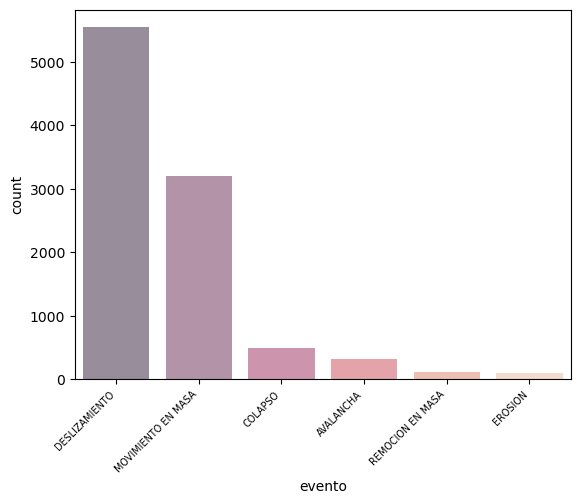

In [20]:
# Ordered Bar Plot by Event

#prepare data for the plot
landslides["evento"] = landslides["evento"].astype("string")
evento_count = landslides["evento"].value_counts(ascending=True)

#barplot
ax=plt.subplot()
sns.countplot(x=landslides["evento"], order=landslides["evento"].value_counts(ascending=False).index,
              palette="rocket", alpha = 0.5)
plt.xticks(rotation=30)

# Get x-axis tick locations and labels
xtick_loc = ax.get_xticks()
xtick_labels = ax.get_xticklabels()

# Set the x-axis ticks
ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'x-small')
plt.show()

In [24]:
# Get dummies for each event then sum them in one variable called derrumbe.
derrumbe_nb = pd.get_dummies(landslides_cede, columns = ['evento'], drop_first = True, dtype = 'int')
derrumbe_nb['num_derr'] = derrumbe_nb['evento_COLAPSO'] + derrumbe_nb['evento_DESLIZAMIENTO'] + derrumbe_nb['evento_EROSION'] + derrumbe_nb['evento_MOVIMIENTO EN MASA'] + derrumbe_nb['evento_REMOCION EN MASA']
#derrumbe_nb.head()
#derrumbe_nb.info()

## Landslides By Rural Population

     index       municipio_x             depto_x  pobl_rur  num_derr
0      600  PUERTO SANTANDER  NORTE DE SANTANDER     673.0         0
1      256         EL MOLINO          LA GUAJIRA    1845.0         0
2       22           ALMEIDA              BOYACA    1985.0         0
3      757              SIPI               CHOCO    3188.0         0
4       14           ALBANIA             CAQUETA    4157.0         0
..     ...               ...                 ...       ...       ...
904     57           ARMENIA             QUINDIO    7805.0       115
905    357            IBAGUE              TOLIMA   29752.0       119
906    451         MANIZALES              CALDAS   26656.0       131
907    463          MEDELLIN           ANTIOQUIA   38813.0       133
908    561           PEREIRA           RISARALDA   72003.0       141

[909 rows x 5 columns]


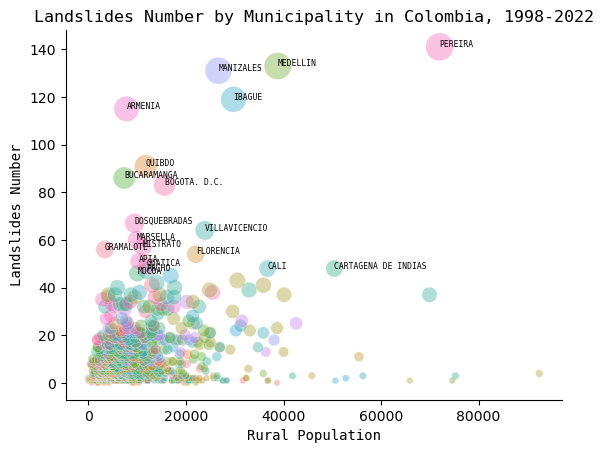

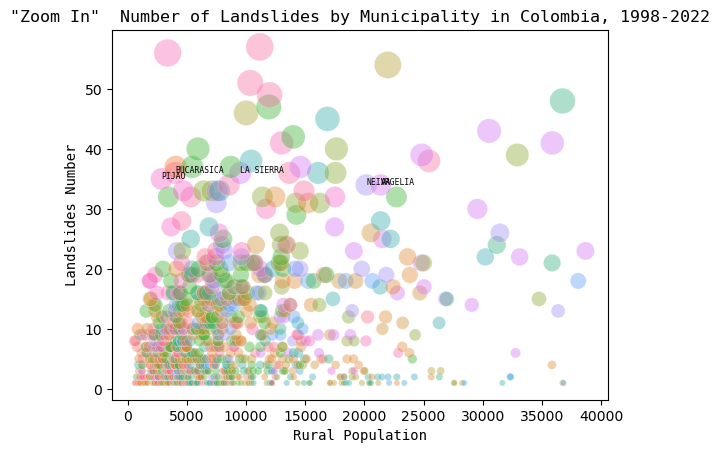

<Figure size 640x480 with 0 Axes>

In [31]:
#Scatterplot landslides + rural population 
landslides_pop = derrumbe_nb.groupby(['municipio_x', 'depto_x', 'pobl_rur']).num_derr.sum().reset_index()
landslides_pop = landslides_pop.sort_values(['num_derr', 'pobl_rur'], ascending=True).reset_index()
print(landslides_pop)


ax = sns.scatterplot(
    data=landslides_pop, x="pobl_rur", y="num_derr", hue="depto_x", size="num_derr",
    sizes=(20, 400), legend=False, alpha=0.4)

# Add annotations one by one with a loop
for line in range(landslides_pop.shape[0]-20, landslides_pop.shape[0]):
    plt.text(landslides_pop.pobl_rur[line]+0.2, landslides_pop.num_derr[line], landslides_pop.municipio_x[line],
             horizontalalignment='left', size='xx-small', color='black', weight='light', family='monospace')
# Remove the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.ylabel('Landslides Number', family='monospace')
plt.xlabel('Rural Population', family='monospace')
plt.title('Landslides Number by Municipality in Colombia, 1998-2022', family='monospace')

# Save the plot as an image file (PNG)
plt.savefig('landslides_plot.png')

plt.show()
plt.clf()

# "Zoom in" - Scatterplot landslides + rural population 

landslides_pop2 = landslides_pop[(landslides_pop.pobl_rur < 40000) & (landslides_pop.pobl_rur>0)]
landslides_pop2 = landslides_pop2[(landslides_pop2.num_derr<60) & (landslides_pop2.num_derr>0)]

sns.scatterplot(
    data=landslides_pop2, x="pobl_rur", y="num_derr", hue="depto_x", size="num_derr",
    sizes=(20, 400), legend=False, alpha=0.4)

# Add annotations one by one with a loop
for line in range(landslides_pop2.shape[0]-5, landslides_pop2.shape[0]):
    plt.text(landslides_pop2.pobl_rur[line]+0.2, landslides_pop2.num_derr[line], landslides_pop2.municipio_x[line],
             horizontalalignment='left', size='xx-small', color='black', weight='light', family='monospace')

plt.ylabel('Landslides Number', family='monospace')
plt.xlabel('Rural Population', family='monospace')
plt.title('\"Zoom In\"  Number of Landslides by Municipality in Colombia, 1998-2022', family='monospace')

# Save the plot as an image file (PNG)
plt.savefig('landslides_plot_zoom.png')

plt.show()
plt.clf()

## Number of Landslides by Department 1998-2022

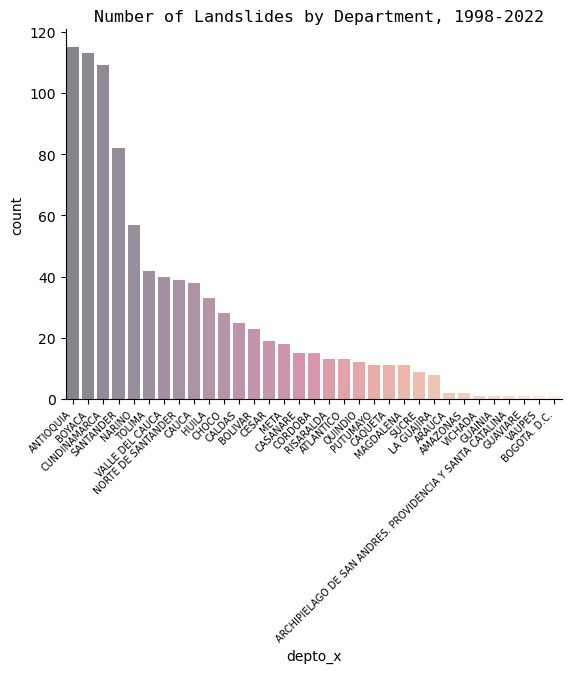

<Figure size 640x480 with 0 Axes>

In [26]:
# Barplot: number of landslides by Department 1998-2022

ax = sns.countplot(x=landslides_pop["depto_x"], order=landslides_pop["depto_x"].value_counts(ascending=False).index,
              palette="rocket", alpha = 0.5)
plt.xticks(rotation=30)
# Get x-axis tick locations and labels
xtick_loc = ax.get_xticks()
xtick_labels = ax.get_xticklabels()
# Remove the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'x-small')
# Title
plt.title(' Number of Landslides by Department, 1998-2022', family='monospace')

# Save the plot as an image file (PNG)
plt.savefig('landslides_by_dept.png')

plt.show()
plt.clf()


## Distribution of Landslides across municipalities in the most affected department.
From this graph we can observe that Antioquia has a lot of municipalities affected by a small number of derrumbe during  the period 1998-2022, while Boyaca and Cundinamarca have a smaller number of municipalities affected by a large number of landslides, that is landslides is more concentrated spatially in some municipalities in Boyaca and Cundinamarca. 

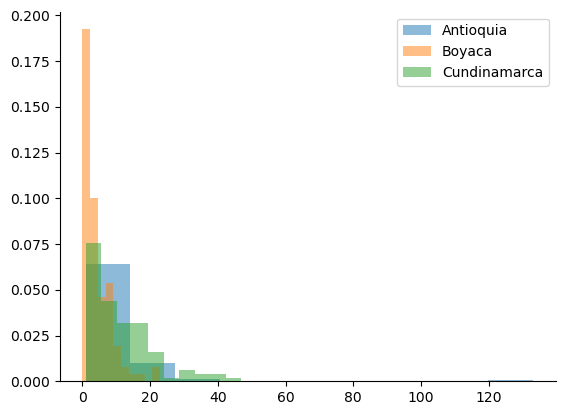

<Figure size 640x480 with 0 Axes>

In [27]:
#Overlapping histograms
ax = plt.subplot()
plt.hist(landslides_pop.num_derr[landslides_pop.depto_x=='ANTIOQUIA'], label='Antioquia', density=True, alpha=.5)
plt.hist(landslides_pop.num_derr[landslides_pop.depto_x=='BOYACA'], label='Boyaca', density=True, alpha=.5)
plt.hist(landslides_pop.num_derr[landslides_pop.depto_x=='CUNDINAMARCA'], label='Cundinamarca', density=True, alpha=.5)
plt.legend()
# Remove the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Save the plot as an image file (PNG)
plt.savefig('landslides_dist_top3.png')
plt.show()
plt.clf()

## Landslides by Rural Population with PIB per capita.

In [28]:
# Data prep
landslides_pop2 = derrumbe_nb[['municipio_x', 'depto_x', 'pib_percapita', 'pobl_rur', 'num_derr']].groupby(['municipio_x', 'depto_x','pobl_rur', 'pib_percapita']).num_derr.sum().reset_index()
landslides_pop2 = landslides_pop2.sort_values(['num_derr'], ascending=True).reset_index()
print(landslides_pop2)


     index   municipio_x     depto_x  pobl_rur  pib_percapita  num_derr
0      581  PUEBLO NUEVO     CORDOBA   20359.0      2781472.5         0
1      167   CHIMICHAGUA       CESAR   19618.0      4607645.5         0
2      846        UNGUIA       CHOCO   10275.0      2527682.0         0
3      256     EL MOLINO  LA GUAJIRA    1845.0      5873327.5         0
4      754          SIPI       CHOCO    3188.0      1659524.5         0
..     ...           ...         ...       ...            ...       ...
901     57       ARMENIA     QUINDIO    7805.0      4785045.5       115
902    356        IBAGUE      TOLIMA   29752.0      5592751.0       119
903    450     MANIZALES      CALDAS   26656.0      4421718.5       131
904    462      MEDELLIN   ANTIOQUIA   38813.0      9252790.0       133
905    560       PEREIRA   RISARALDA   72003.0      5537843.0       141

[906 rows x 6 columns]


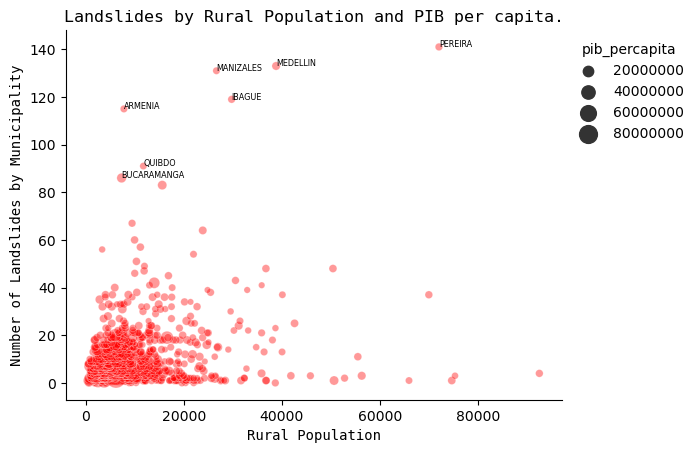

<Figure size 640x480 with 0 Axes>

In [29]:
ax = sns.scatterplot(
    data=landslides_pop2, x="pobl_rur", y="num_derr", size="pib_percapita",
    sizes=(20, 200), legend="auto", alpha = 0.4, color="red")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False)
# Remove the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# add annotations one by one with a loop
for line in range(landslides_pop2.shape[0]-7,landslides_pop2.shape[0]):
     plt.text(landslides_pop2.pobl_rur[line]+0.2, landslides_pop2.num_derr[line], landslides_pop2.municipio_x[line], horizontalalignment='left', size='xx-small', color='black', weight='light')
plt.title('Landslides by Rural Population and PIB per capita.', family='monospace')
plt.xlabel('Rural Population', family='monospace')
plt.ylabel('Number of Landslides by Municipality', family='monospace')

# Save the plot as an image file (PNG)
plt.savefig('landslides_rural_pop_pib.png')
plt.show()
plt.clf()


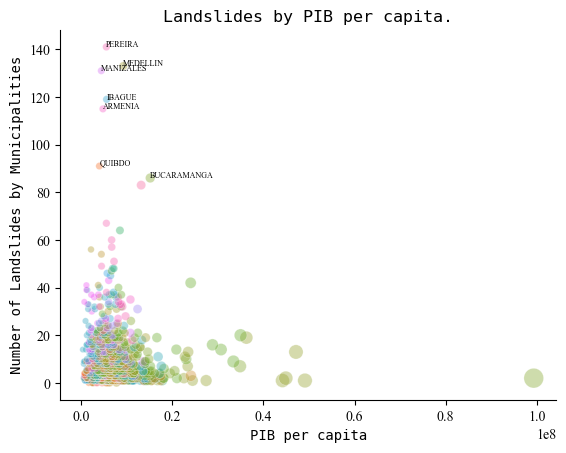

<Figure size 640x480 with 0 Axes>

In [439]:
ax = sns.scatterplot(
    data=landslides_pop2, x="pib_percapita", y="num_derr", hue="depto_x",size="pib_percapita",
    sizes=(20, 200), legend=False, alpha = 0.4, color="red")
# Remove the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# add annotations one by one with a loop
for line in range(landslides_pop2.shape[0]-7,landslides_pop2.shape[0]):
     plt.text(landslides_pop2.pib_percapita[line]+0.2, landslides_pop2.num_derr[line], landslides_pop2.municipio_x[line], horizontalalignment='left', size='xx-small', color='black', weight='light')
plt.title('Landslides by PIB per capita.', family='monospace')
plt.xlabel('PIB per capita', family='monospace')
plt.ylabel('Number of Landslides by Municipality', family='monospace')

# Save the plot as an image file (PNG)
plt.savefig('landslides_pib.png')
plt.show()
plt.clf()

## Time Series Boxplot of Landslides

     year_x          municipio_x          depto_x  vias
0      1998            AQUITANIA           BOYACA     6
1      1998            CHAPARRAL           TOLIMA    23
2      1998           MONTENEGRO          QUINDIO    11
3      1998  SANTA ROSA DE CABAL        RISARALDA    14
4      1999         BOGOTA. D.C.     BOGOTA. D.C.     0
..      ...                  ...              ...   ...
920    2022            VIRACACHA           BOYACA     1
921    2022              VITERBO           CALDAS     1
922    2022           YACUANQUER           NARINO    10
923    2022               ZARZAL  VALLE DEL CAUCA     0
924    2022              ZIPACON     CUNDINAMARCA     2

[925 rows x 4 columns]


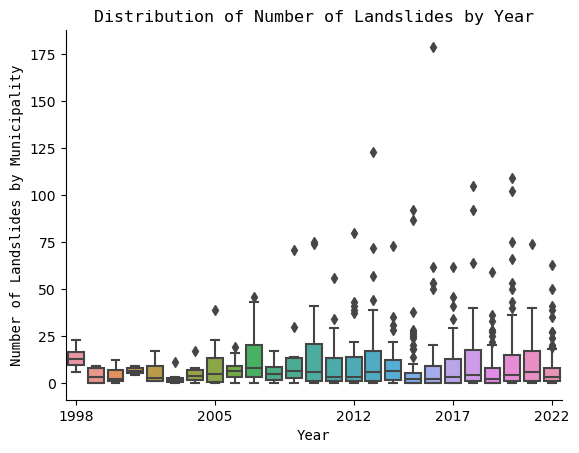

<Figure size 640x480 with 0 Axes>

In [30]:
landslides_year = derrumbe_nb.groupby(['year_x','municipio_x', 'depto_x']).vias.sum().reset_index()
print(landslides_year)

# box plot grouped by year
ax = plt.subplot()
sns.boxplot(landslides_year, x="year_x", y="vias")
ax.set_xticks([0, 7, 14, 19, 24])
plt.title('Distribution of Number of Landslides by Year', family='monospace')
plt.xlabel('Year', family='monospace')
plt.ylabel('Number of Landslides by Municipality', family='monospace')
# Remove the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Save the plot as an image file (PNG)
plt.savefig('landslides_boxplot_ts.png')
plt.show()
plt.clf()